<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/haar_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

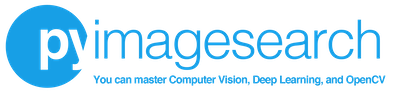

# OpenCV Face detection with Haar cascades
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [OpenCV Face detection with Haar cascades](https://www.pyimagesearch.com/2021/04/05/opencv-face-detection-with-haar-cascades/) blog post published on 2021-04-05.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook.

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
!unzip -qq haar-face-detection.zip
%cd haar-face-detection

--2023-11-16 02:42:01--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/haar-face-detection/haar-face-detection.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.234.193, 3.5.77.140, 3.5.83.196, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.234.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184692 (2.1M) [application/zip]
Saving to: ‘haar-face-detection.zip’

haar-face-detection 100%[===================>]   2.08M  7.03MB/s    in 0.3s    

2023-11-16 02:42:02 (7.03 MB/s) - ‘haar-face-detection.zip’ saved [2184692/2184692]

/content/haar-face-detection


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing face detection with OpenCV and Haar Cascades

In [4]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/adrian_01.png",
    "cascade": "haarcascade_frontalface_default.xml"
}

In [5]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# load the input image from disk, resize it, and convert it to
# grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading face detector...


[INFO] performing face detection...
[INFO] 1 faces detected...


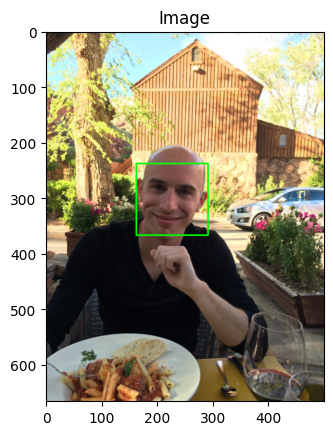

In [6]:
# detect faces in the input image using the haar cascade face
# detector
print("[INFO] performing face detection...")
rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=5, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)
print("[INFO] {} faces detected...".format(len(rects)))

# loop over the bounding boxes
for (x, y, w, h) in rects:
	# draw the face bounding box on the image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

### Implementing real-time face detection with Haar cascade

In [7]:
# first, let's get a video on which we can run our face detector
!wget https://colab-notebook-videos.s3-us-west-2.amazonaws.com/opencv_face_detection.mp4

--2023-11-16 02:42:04--  https://colab-notebook-videos.s3-us-west-2.amazonaws.com/opencv_face_detection.mp4
Resolving colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)... 3.5.76.178, 52.218.221.25, 3.5.82.144, ...
Connecting to colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)|3.5.76.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36191613 (35M) [video/mp4]
Saving to: ‘opencv_face_detection.mp4’

opencv_face_detecti 100%[===================>]  34.51M  10.2MB/s    in 3.4s    

2023-11-16 02:42:07 (10.2 MB/s) - ‘opencv_face_detection.mp4’ saved [36191613/36191613]



In [8]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "input": "opencv_face_detection.mp4",
    "output": "output.avi",
    "cascade": "haarcascade_frontalface_default.xml"
}

In [9]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector...
[INFO] opening video file...


In [10]:
# loop over the frames from the video stream
while True:
	# grab the next frame
	frame = vs.read()[1]

	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break

    # resize the frame and convert it to grayscale
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# perform face detection
	rects = detector.detectMultiScale(gray, scaleFactor=1.05,
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)


	# loop over the bounding boxes
	for (x, y, w, h) in rects:
		# draw the face bounding box on the image
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)

	# if the writer is not None, write the frame to disk
	if writer is not None:
		writer.write(frame)

# do a bit of cleanup
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

Note that the above code block may take time to execute. If you are interested to view the video within Colab just execute the following code blocks. Note that it may be time-consuming.

Our output video is produced in `.avi` format. First, we need to convert it to `.mp4` format.

In [11]:
!ffmpeg -i output.avi output.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [12]:
#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

This code is referred from [this StackOverflow thread](https://stackoverflow.com/a/57378660/7636462).

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV Face detection with Haar cascades*](https://www.pyimagesearch.com/2021/04/05/opencv-face-detection-with-haar-cascades/) blog post published on 2021-04-05.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```